In [22]:
using PyPlot

In [23]:
function rk4(x, h, ode)
    # x --> state vector
    # h --> time step
    # ode --> function that maps state vector to derivative vector
    # returns next state
    k1 = ode( x )
    k2 = ode( x + h/2*k1 )
    k3 = ode( x + h/2*k2 )
    k4 = ode( x + h/2*k3 )
    return x + h/6*(k1 + 2*k2 + 2*k3 + k4)
end

rk4 (generic function with 1 method)

In [24]:
function iterate_solver(;solver=(s(x, h) = x), init_condition=[1;1], step_size=.1, final=.5)
    #assumes init_condition at t=0
    #solver is numerical ode that takes in x and outputs x_next
    #init_condition is an array of (pos, vel.) (x)
    #ODE takes in x and outputs xdot
    time = 0.0: step_size: final
    states = zeros(length(time),length(init_condition))
    x = init_condition
    for i = 1:length(time)
        x = solver(x, step_size)
        states[i,:] = x
    end
    return  time, states
end

iterate_solver (generic function with 1 method)

In [25]:
k = 2
m = .5
b = 0.0
sho(x) = [ 0 1; -k/m -b/m]*x

sho (generic function with 1 method)

In [26]:
rk(x, h) = rk4(x, h, sho)
x_o = [-1;-2]
s = .01
t = 500
T,states = iterate_solver(solver=rk, init_condition=x_o, step_size=s, final=t )

(0.0:0.01:500.0, [-1.01983 -1.95967; -1.03926 -1.91855; … ; -7.3763 2.55476; -7.34952 2.84937])

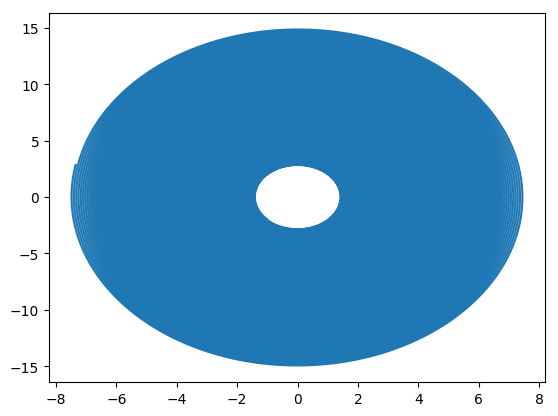

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f663ec8ad50>

In [27]:
plot(states[:,1], states[:,2])

## Observation
So it looks like it is very slowly spiralling outwards. Trapezoidal spiralled outwards hardly at all, perhaps only from machine epsilon -type errors. THis looks like it's making a very slight numericall error that tends to over-approximate the function.

In [67]:
s = 10
B = 8/7
r = 15.58
function sys(x)
    u = s * ( x[2] - x[1] )
    v = x[1] * ( r - x[3] ) - x[2]
    w = x[1] * x[2] - B*x[3]
    return [u; v; w]
end

sys (generic function with 1 method)

In [68]:
x_o = [10; 0; 10]
h = .01
t = 80
rk(x, h) = rk4(x, h, sys)
t, states = iterate_solver(solver=rk, init_condition= x_o, step_size=h, final=t);

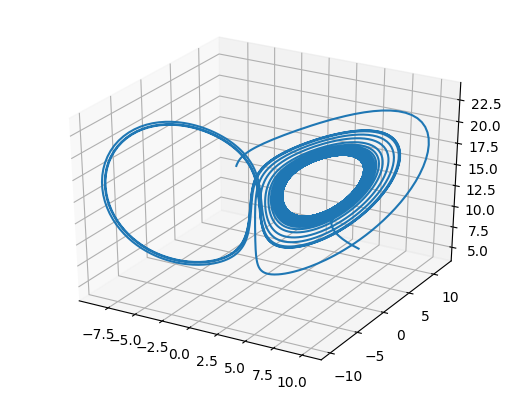

1-element Array{PyCall.PyObject,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x7f663e3fb810>

In [69]:
fig = figure()
ax = fig[:add_subplot](111, projection="3d")
ax[:plot](states[:,1], states[:,2], states[:,3])

must be the lorenz system. interesting that what I am seeing is not exactly the true behavior becasue of rk4 numerical errors. would be nice to be able to explore this plot in 3d interactively

# slowly increasing r from a low to high value results in a bifurcation from a fixed point to a chaotic periodcicity with two major cycles!